# Notebook for debugging

***

In [1]:
%run -i imports.py
%matplotlib inline

Python==3.10.13

numpy==1.26.3
pandas==2.2.0


In [2]:
image_size = (128,512)

***

In [33]:
from pypiv import Particle, Image

particles = Particle(1, 
                     size=image_size, 
                     densities=(0.1,0.11),
                     diameters=(6,10),
                     distances=(1,1),
                     diameter_std=1,
                     seeding_mode='random', 
                     random_seed=100)

In [34]:
image = Image(size=image_size, 
              random_seed=100)

In [35]:
image.add_particles(particles)

Particles added to the image.


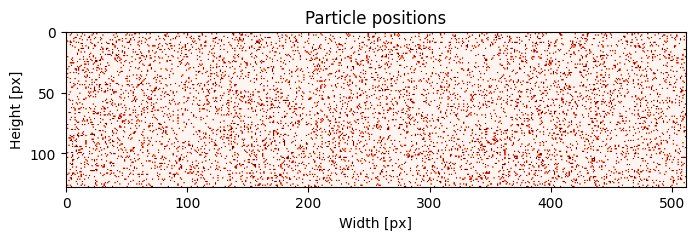

In [36]:
image.plot(0, 
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Particle positions',
           cmap='Reds',
           figsize=(8,8), 
           filename='particle-positions.png');

In [37]:
image.add_reflected_light(exposures=(0.02,0.8),
                          maximum_intensity=2**16-1,
                          laser_beam_thickness=1,
                          laser_over_exposure=1,
                          laser_beam_shape=0.15, 
                          alpha=1/20)

Reflected light added to the image.


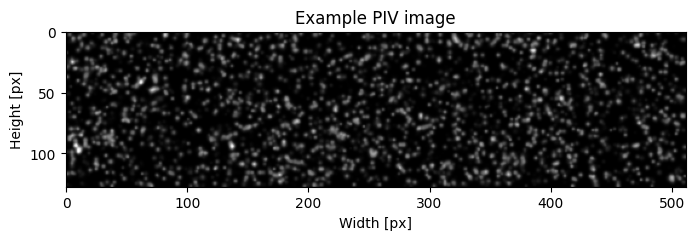

In [38]:
image.plot(0, 
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Example PIV image',
           cmap='Greys_r',
           figsize=(8,8), 
           filename='example-image.png');

***